In [ ]:
NAME = ""
ID = ""
SECTION = ""
"This assignment has some mistake. So do it on your own risk"

# Instructions:

This is your special assessment for CSE330 Lab. ***Please read the instructions carefully!***

1. Click on File -> Save a copy in drive. You must rename this file as "ID_Name_Section_SA.ipynb". Example: "21212121_Niloy Farhan_01-SA.ipynb".
2. There are 4 tasks and each task have several substasks. This tasks are based on the content of lab 5 and lab 6.
3. You must use designated cells for each task. You should not use additional cells for codes of a task.
4. Some task may have no output. It will be mentioned in the designated cells.
5. Not a single line of code of this assessment should be written by AI. If you do, karma will hit you back. ;)
6. **Plagarism can lead to a zero mark in Final Assessment.**
7. If you have any queries, reach out to your lab faculties.


**Best of luck!**

# Task1.


Let $f(x)$ be a function of $x$.

$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{1.1}$$

a. Plot the function for $$-2.5 \le x \le 1.5$$

b. What is the actual slope of $f(x)$ at $x = 0 , -1.18625$ ?  Print $f'(x)$ and plot $f'(x)$ at $ -2 \le x \le 1.2$.

For c to e, assume step size is $0.1$.

c. Use forward differntiation to figure out the slope at $x = 0 , -1.18625$.

d. Use backward differntiation to figure out the slope at $x = 0 , -1.18625$.

e. Use central differntiation to figure out the slope at $x = 0 , -1.18625$.

f. Compare the error of each method with actual differentiation at $x = 0 , -1.18625$ by showing in a Pandas Dataframe.

g. plot error vs h curves with proper label and color for each method at $x = 0$ and $h = [0.55, 0.3, .17, 0.1, 0.055, 0.03, 0.017, 0.01]$.


In [ ]:
# Import cells. This is done for you!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

2.0 + 1.0·x - 6.0·x² - 2.0·x³ + 2.5·x⁴ + 1.0·x⁵


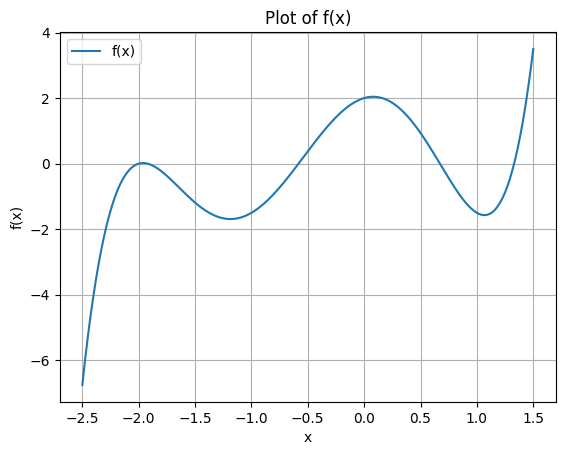

In [ ]:
#1.a This cell should plot a graph. You must use polynomial class.
# f(x) = 2 + x - 6x^2 - 2x^3 + 2.5x^4 + x^5
coeffcients = [2, 1, -6, -2, 2.5, 1]
func = Polynomial(coeffcients)
print(func)

x_vals = np.linspace(-2.5, 1.5, 500)
y_vals = func(x_vals)

plt.plot(x_vals, y_vals, label="f(x)")
plt.title("Plot of f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

The f'(x) is 5*x**4 + 10*x**3 - 6*x**2 - 12*x + 1
Slope at x = 0: 1
Slope at x = -1.18625: -9.340808109215004e-06


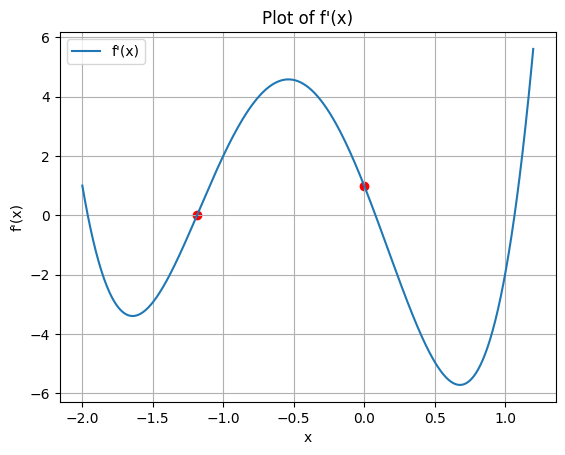

In [ ]:
#1.b This cell should print and plot a graph.
# f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2
# f'(x)
def func_prime(x):
    return 5*x**4 + 10*x**3 - 6*x**2 - 12*x + 1

x_1 = 0
x_2 = -1.18625
slope_x1 = func_prime(x_1)
slope_x2 = func_prime(x_2)

print(f"The f'(x) is 5*x**4 + 10*x**3 - 6*x**2 - 12*x + 1")
print(f"Slope at x = {x_1}: {slope_x1}")
print(f"Slope at x = {x_2}: {slope_x2}")

x_vals = np.linspace(-2, 1.2, 500)
y_vals = func_prime(x_vals)

plt.plot(x_vals, y_vals, label="f'(x)")
plt.scatter([x_1, x_2], [slope_x1, slope_x2], color='red')
plt.title("Plot of f'(x)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#1.c This cell should print
def forward_diff(f, x, h = 0.1):
    return (f(x + h) - f(x)) / h

x_0 = 0
x_1 = -1.18625

slope_fwd_x0 = forward_diff(func, x_0)
slope_fwd_x1 = forward_diff(func, x_1)

print(f"Forward differentiation slope at x = {x_0}: {slope_fwd_x0}")
print(f"Forward differentiation slope at x = {x_1}: {slope_fwd_x1}")

Forward differentiation slope at x = 0: 0.3826000000000018
Forward differentiation slope at x = -1.18625: 0.5520088838012782


In [ ]:
#1.d This cell should print
def backward_diff(f, x, h=0.1):
    return (f(x) - f(x - h)) / h

x_0 = 0
x_1 = -1.18625

slope_bwd_x0 = backward_diff(func, x_0)
slope_bwd_x1 = backward_diff(func, x_1)

print(f"Backward differentiation slope at x = {x_0}: {slope_bwd_x0}")
print(f"Backward differentiation slope at x = {x_1}: {slope_bwd_x1}")

Backward differentiation slope at x = 0: 1.5776000000000012
Backward differentiation slope at x = -1.18625: -0.5476397529174859


In [ ]:
#1.e This cell should print
def central_diff(f, x, h=0.1):
    return (f(x + h) - f(x - h)) / (2 * h)

x_0 = 0
x_1 = -1.18625

slope_cen_x0 = central_diff(func, x_0)
slope_cen_x1 = central_diff(func, x_1)

print(f"Central differentiation slope at x = {x_0}: {slope_cen_x0}")
print(f"Central differentiation slope at x = {x_1}: {slope_cen_x1}")

Central differentiation slope at x = 0: 0.9801000000000015
Central differentiation slope at x = -1.18625: 0.002184565441896158


In [ ]:
#1.f This cell should show a table
def compare(f, func_prime, h, x_vals):
    Result = {'x': [], 'Actual': [], 'FD': [], 'BD': [], 'CD': [], 'FD Error': [], 'BD Error': [], 'CD Error': []}

    for x in x_vals:
        actual_slope = func_prime(x)
        fd_slope = forward_diff(f, x, h)
        bd_slope = backward_diff(f, x, h)
        cd_slope = central_diff(f, x, h)

        Result['x'].append(x)
        Result['Actual'].append(actual_slope)
        Result['FD'].append(fd_slope)
        Result['BD'].append(bd_slope)
        Result['CD'].append(cd_slope)
        Result['FD Error'].append(abs(actual_slope - fd_slope))
        Result['BD Error'].append(abs(actual_slope - bd_slope))
        Result['CD Error'].append(abs(actual_slope - cd_slope))

    return pd.DataFrame(Result)

x_values = [0, -1.18625]

h_value = 0.1
df_comparison = compare(func, func_prime, h_value, x_values)
print(df_comparison)

         x    Actual        FD       BD        CD  FD Error  BD Error  \
0  0.00000  1.000000  0.382600  1.57760  0.980100  0.617400   0.57760   
1 -1.18625 -0.000009  0.552009 -0.54764  0.002185  0.552018   0.54763   

   CD Error  
0  0.019900  
1  0.002194  


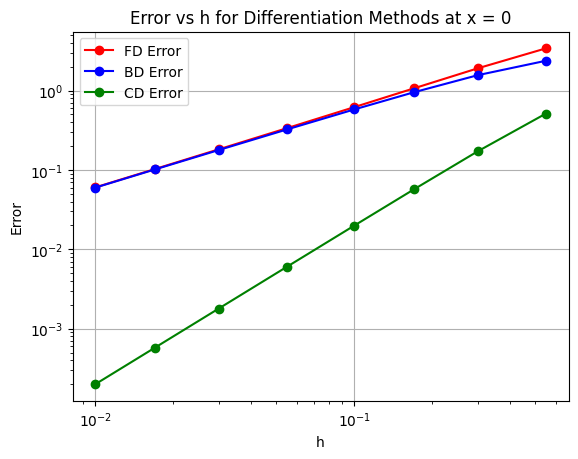

In [ ]:
#1g This cell should plot a graph.
h_values = [0.55, 0.3, 0.17, 0.1, 0.055, 0.03, 0.017, 0.01]

def error_vs_h(f, f_prime, x):
    fd_errors = []
    bd_errors = []
    cd_errors = []

    for h in h_values:
        actual_slope = func_prime(x)
        fd_slope = forward_diff(f, x, h)
        bd_slope = backward_diff(f, x, h)
        cd_slope = central_diff(f, x, h)

        fd_errors.append(abs(actual_slope - fd_slope))
        bd_errors.append(abs(actual_slope - bd_slope))
        cd_errors.append(abs(actual_slope - cd_slope))

    return fd_errors, bd_errors, cd_errors

fd_err_x0, bd_err_x0, cd_err_x0 = error_vs_h(func, func_prime, x_0)

plt.plot(h_values, fd_err_x0, label="FD Error", color="red", marker='o')
plt.plot(h_values, bd_err_x0, label="BD Error", color="blue", marker='o')
plt.plot(h_values, cd_err_x0, label="CD Error", color="green", marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('Error')
plt.title('Error vs h for Differentiation Methods at x = 0')
plt.grid(True)
plt.legend()
plt.show()

# Task 2.

a. Propose a better technique for numerical differentiation that provides higher accuracy than the methods you have worked so far. You need to write a function for your proposed technique.

Let, $$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{2.1}$$

b. Using your proposed method, what is the slope of $f(x)$  at $x=0,−1.18625$ and step size = 0.1?

c. Compare the error of your method with  actual, forward, backward and central differentiation at  $x=0,−1.18625$  by showing in Pandas Dataframe.

d. Plot actual derivative, Forward derivative, Backward derivative, Central derivative and the derivative from your proposed method in a graph. Here, $$h = 0.1, -2 \le x \le 1.2$$

In [ ]:
#2a. This cell should not have any output.
Proposed_Method_Name = "Richardson extrapolation method"

def richardson_extrapolation(f, x, h):
    D1 = central_diff(f, x, h)
    D2 = central_diff(f, x, h/2)
    # Richardson extrapolation formula
    return (4 * D2 - D1) / 3

In [ ]:
#2b. This cell should print
x_values = [0, -1.18625]
h = 0.1

slopes = [richardson_extrapolation(func, x, h) for x in x_values]
print(f"Slopes at x=0 and x=-1.18625 are: {slopes}")

Slopes at x=0 and x=-1.18625 are: [0.9999750000000011, -3.4340808106048115e-05]


In [ ]:
#This cell should print
def compare1(f, func_prime, h, x):
    Result = {'x' : [], "Actual" : [], "FD": [], "BD" : [], "CD": [], "RE": [],
              "FD Error" : [], "BD Error": [], "CD Error" : [], "RE Error" : []}

    for value in x:
        actual = func_prime(value)
        fd = forward_diff(f, value, h)
        bd = backward_diff(f, value, h)
        cd = central_diff(f, value, h)
        re = richardson_extrapolation(f, value, h)

        Result['x'].append(x)
        Result['Actual'].append(actual)
        Result['FD'].append(fd)
        Result['BD'].append(bd)
        Result['CD'].append(cd)
        Result['RE'].append(re)

        Result['FD Error'].append(np.abs(actual - fd))
        Result['BD Error'].append(np.abs(actual - bd))
        Result['CD Error'].append(np.abs(actual - cd))
        Result['RE Error'].append(np.abs(actual - re))

    return Result

x_values = [0, -1.18625]
h = 0.1
results = compare1(func, func_prime, h, x_values)
df = pd.DataFrame(results)
print(df)

               x    Actual        FD       BD        CD        RE  FD Error  \
0  [0, -1.18625]  1.000000  0.382600  1.57760  0.980100  0.999975  0.617400   
1  [0, -1.18625] -0.000009  0.552009 -0.54764  0.002185 -0.000034  0.552018   

   BD Error  CD Error  RE Error  
0   0.57760  0.019900  0.000025  
1   0.54763  0.002194  0.000025  


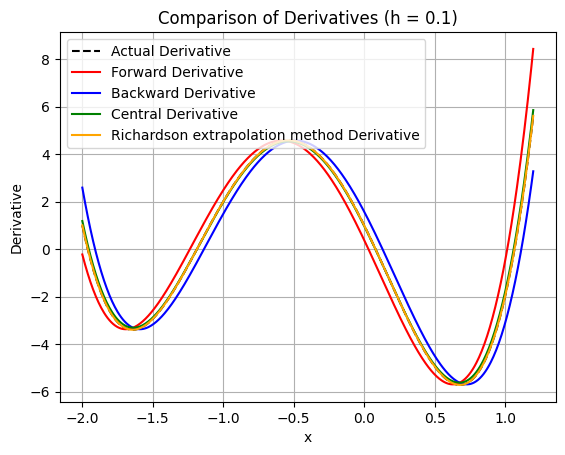

In [ ]:
#2.d This cell should plot a graph.
x_vals = np.linspace(-2, 1.2, 500)

actual_derivative = func_prime(x_vals)
fd_derivative = [forward_diff(func, x, h) for x in x_vals]
bd_derivative = [backward_diff(func, x, h) for x in x_vals]
cd_derivative = [central_diff(func, x, h) for x in x_vals]
re_derivative = [richardson_extrapolation(func, x, h) for x in x_vals]

plt.plot(x_vals, actual_derivative, label="Actual Derivative", color="black", linestyle="--")
plt.plot(x_vals, fd_derivative, label="Forward Derivative", color="red")
plt.plot(x_vals, bd_derivative, label="Backward Derivative", color="blue")
plt.plot(x_vals, cd_derivative, label="Central Derivative", color="green")
plt.plot(x_vals, re_derivative, label=f"{Proposed_Method_Name} Derivative", color="orange")

plt.title(f"Comparison of Derivatives (h = {h})")
plt.xlabel("x")
plt.ylabel("Derivative")
plt.grid(True)
plt.legend()
plt.show()

# Task 3.

Given,
$f(x) = \frac{-1}{13}x^3 + 2x^2 - 9.5x - 10\tag{3.1}$

a. (i) Write a python function that takes an input function and a list of intervals as a list and returns a dictionary that contains either root exists or not in each intervals.
Determine if root exists in $[(-20,-10),(-10,0), (0,10), (10,20), (20,30)]$.

(ii) Verify your method by ploting the function and the intervals.

In [ ]:
#3a_i This cell should print
intervals = [(-20,-10),(-10,0), (0,10), (10,20), (20,30)]

def f(x):
    return (-1/13) * x**3 + 2 * x**2 - 9.5 * x - 10

def check_roots(f, intervals):
    root_exists = {}

    for interval in intervals:
        a, b = interval
        f_a = f(a)
        f_b = f(b)

        if f_a * f_b < 0:
            root_exists[interval] = "Root exists"
        else:
            root_exists[interval] = "No root"

    return root_exists

root_check = check_roots(f, intervals)
print(root_check)

{(-20, -10): 'No root', (-10, 0): 'Root exists', (0, 10): 'Root exists', (10, 20): 'Root exists', (20, 30): 'No root'}


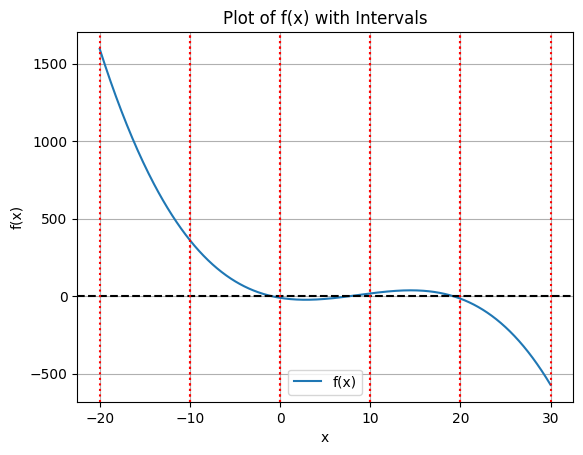

In [ ]:
#3a_ii This cell should plot a graph.
x_vals = np.linspace(-20, 30, 500)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label="f(x)")
plt.axhline(0, color='black', linestyle='--')

for interval in intervals:
    plt.axvline(interval[0], color='red', linestyle=':')
    plt.axvline(interval[1], color='red', linestyle=':')

plt.title("Plot of f(x) with Intervals")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

b. Using Bisection method, find roots of the function $3.1$ in these intervals $[(−20,−10),(−10,0),(0,10),(10,20),(20,30)]$ where root exists. The value of machine epsilon is, $\epsilon < 10^{-6}$


You can reuse the function of Task 3.a to find out the intervals that contains root.
Note: You should return 3 different roots for the function (3.1).

In [ ]:
#3b This cell should print
def bisection(f, a, b, epsilon=1e-6):
    if f(a) * f(b) >= 0:
        print("Bisection method fails: No root in this interval.")
        return None

    while (b - a) / 2 > epsilon:
        midpoint = (a + b) / 2
        if f(midpoint) == 0:
            return midpoint
        elif f(a) * f(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint

    return (a + b) / 2

root_intervals = [interval for interval, result in root_check.items() if result == "Root exists"]

roots = []
for interval in root_intervals:
    root = bisection(f, interval[0], interval[1])
    roots.append(root)
    print(f"Root found in interval {interval}: {root}")

Root found in interval (-10, 0): -0.8829361200332642
Root found in interval (0, 10): 7.658982872962952
Root found in interval (10, 20): 19.22395408153534


c. Plot the f(x) along with the roots to check if your method is working correctly.

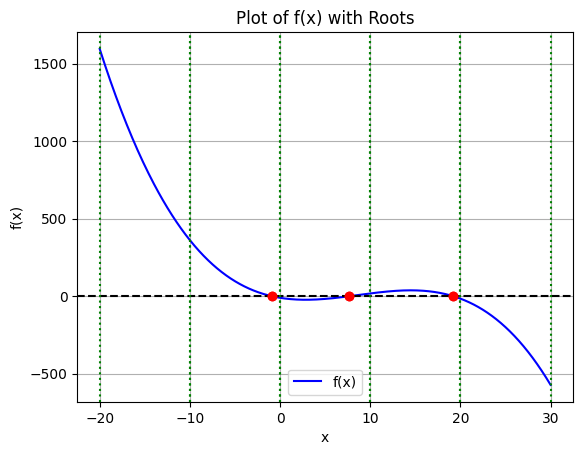

In [ ]:
#3c This cell plot a graph.
for interval in root_intervals:
    root = bisection(f, interval[0], interval[1])
    roots.append(root)

x_vals = np.linspace(-20, 30, 500)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label="f(x)", color='blue')
plt.axhline(0, color='black', linestyle='--')

for root in roots:
    if root is not None:
        plt.plot(root, f(root), 'ro')

for interval in intervals:
    plt.axvline(interval[0], color='green', linestyle=':')
    plt.axvline(interval[1], color='green', linestyle=':')

plt.title("Plot of f(x) with Roots")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

#Task4.


Let $f(x)$ be a function of $x$.

$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + \frac{x}{2} + 2\tag{4.1}$$

a. Find the actual roots of $f(x)$ and print them.

b. Plot the function for $-2.5 \le x \le 1.5$, also point out the the found roots in the plot

c. The following $g_{1}(x)$ is given which is derived from Eq$(4.1)$, \\
   Use Contraction Mapping Theorem and calculate the value of λ for the given $g(x)$ $$g_{1}(x)= 2(-x^5 - 2.5x^4 + 2x^3 + 6x^2 - 2)\tag{4.2}$$

d. Compute the convergence/divergence table using all the calculated roots for the given $g_{1}(x)$ and prove the whole $g_{1}(x)$ is divergent

Given,

$$g_{2}(x)= \sqrt{\frac{1}{6}(x^5 + 2.5x^4 -2x^3 + \frac{1}{2}x + 2)}\tag{4.3}$$
$$g_{3}(x) = \sqrt[\leftroot{-1}\uproot{2}\scriptstyle 4]{\frac{1}{2.5}(-x^5 + 2x^3 + 6x^2 - \frac{1}{2}x - 2)}\tag{4.4}$$
e. Derive 2 more separate $g_{4}(x)$ and $g_{5}(x)$ from the given $f(x)$. Implement $g_{2}(x)$, $g_{3}(x)$, $g_{4}(x)$ and $g_{5}(x)$.

f. Apply Fixed Point Method on the $g_{2}(x)$, $g_{3}(x)$, $g_{4}(x)$ and $g_{5}(x)$. and find the approprate roots, show 20 iterations for each $g(x)$ for $x_{0}$ = 0.8 and show the convergence table using data from each iteration

g. Plot the $g(x)$s where actual roots were found along with $f(x)$.

In [ ]:
#4a This cell should print
def f(x):
    return x**5 + 2.5*x**4 - 2*x**3 - 6*x**2 + 0.5*x + 2

def f_prime(x):
    return 5*x**4 + 10*x**3 - 6*x**2 - 12*x + 0.5

def newtons_method(f, f_prime, x0, tolerance=1e-6, max_iter=1000):
    x = x0
    for _ in range(max_iter):
        fx = f(x)
        fpx = f_prime(x)
        if abs(fx) < tolerance:
            return x
        x -= fx / fpx
    return x

initial_guesses = [-2, -1, 0, 1]
roots = [newtons_method(f, f_prime, val) for val in initial_guesses]
unique_roots = np.unique(np.round(roots, decimals=5))
print("Roots of f(x):", unique_roots)

Roots of f(x): [-2.22028 -0.65499  1.37527]


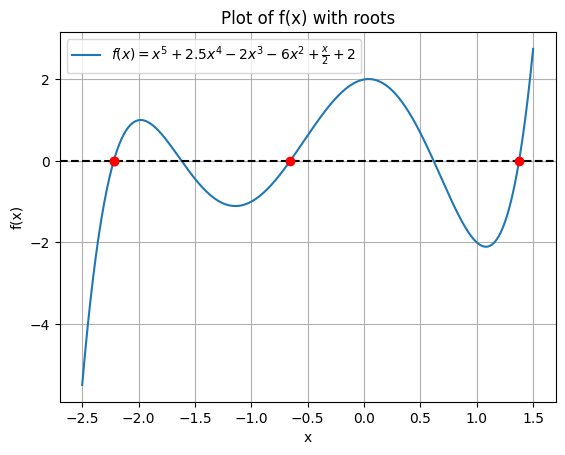

In [ ]:
#4b This cell should print plot a graph
x_vals = np.linspace(-2.5, 1.5, 500)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label=r'$f(x) = x^5 + 2.5x^4 - 2x^3 - 6x^2 + \frac{x}{2} + 2$')
plt.axhline(0, color='black', linestyle='--')

for root in roots:
    plt.plot(root, f(root), 'ro')

plt.title("Plot of f(x) with roots")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#4c This cell should print
def g1(x):
    return 2 * (-x**5 - 2.5*x**4 + 2*x**3 + 6*x**2 - 2)

def g1_prime(x):
    return 2 * (-5*x**4 - 10*x**3 + 6*x**2 + 12*x)

x_vals = np.linspace(-2.5, 1.5, 500)
g1_prime_vals = np.abs(g1_prime(x_vals))
lambda_value = np.max(g1_prime_vals)

print(f"The value of lambda for g1(x) is approximately: {lambda_value}")

The value of lambda for g1(x) is approximately: 63.125


In [ ]:
#4c This cell should print
def check_convergence(g1_prime, root):
  derivative_value = g1_prime(root)
  if abs(derivative_value) < 1:
      convergence_status = "Convergent"
  else:
      convergence_status = "Divergent"
  convergence_table.append((root, derivative_value, convergence_status))

def root_calculation(g1, g1_prime, initial_guesses_g1):
  for val in initial_guesses_g1:
      try:
          root = newtons_method(g1, g1_prime, val)
          check_convergence(g1_prime, root)
      except ZeroDivisionError:
          convergence_table.append((val, "N/A", "Divergent (Division by Zero)"))
  return convergence_table

convergence_table = []
initial_guesses_g1 = [-2, -1, 0, 1]
convergence_table = root_calculation(g1, g1_prime, initial_guesses_g1)

print("Convergence/Divergence Table:")
print("Root | g'_1(root) | Status")
for row in convergence_table:
    if row[1] == "N/A":
        print(f"{row[0]:<6} | {row[1]:<12} | {row[2]}")
    else:
        print(f"{row[0]:<6} | {row[1]:<12.6f} | {row[2]}")

Convergence/Divergence Table:
Root | g'_1(root) | Status
-2     | N/A          | Divergent (Division by Zero)
-0.7575690077763905 | -5.892922    | Divergent
0      | N/A          | Divergent (Division by Zero)
-1.4142135623741197 | 6.627417     | Divergent


In [ ]:
#4e This cell have no outputs
def g2(x):
    return np.sqrt((x**5 + 2.5*x**4 - 2*x**3 + 0.5*x + 2) / 6)

def g3(x):
    return ((1 / 2.5) * (-x**5 + 2 * x**3 + 6 * x**2 - 0.5 * x - 2)) ** (1 / 4)

def g4(x):
    return np.cbrt(((1/2) * (x**5 + 2.5 * x**4 - 6 * x**2 + (1/2) * x + 2)))

def g5(x):
    return (-2.5*x**4 + 2 * x**3 + 6 * x**2 - 0.5 * x - 2) ** (1 / 5)

In [ ]:
#4f This cell should print
def fixed_point_iteration(g, x0 = 0.8, iterations=20):
    x_values = [x0]
    for _ in range(iterations):
        x_next = g(x_values[-1])
        x_values.append(x_next)
    return x_values

iterations_g2 = fixed_point_iteration(g2)
iterations_g3 = fixed_point_iteration(g3)
iterations_g4 = fixed_point_iteration(g4)
iterations_g5 = fixed_point_iteration(g5)

def create_convergence_table(x_values, iterations = 20):
    return pd.DataFrame({
        'Iteration': list(range(iterations + 1)),
        'x': x_values,
        'f(x)': [f(x) for x in x_values]
    })

convergence_table_g2 = create_convergence_table(iterations_g2)
convergence_table_g3 = create_convergence_table(iterations_g3)
convergence_table_g4 = create_convergence_table(iterations_g4)
convergence_table_g5 = create_convergence_table(iterations_g5)

convergence_table_g2, convergence_table_g3, convergence_table_g4, convergence_table_g5

(    Iteration         x          f(x)
 0           0  0.800000 -1.112320e+00
 1           1  0.674250 -3.475685e-01
 2           2  0.629830 -7.237751e-02
 3           3  0.620179 -1.313233e-02
 4           4  0.618412 -2.313983e-03
 5           5  0.618100 -4.055661e-04
 6           6  0.618046 -7.101573e-05
 7           7  0.618036 -1.243300e-05
 8           8  0.618034 -2.176631e-06
 9           9  0.618034 -3.810583e-07
 10         10  0.618034 -6.671103e-08
 11         11  0.618034 -1.167895e-08
 12         12  0.618034 -2.044607e-09
 13         13  0.618034 -3.579443e-10
 14         14  0.618034 -6.266498e-11
 15         15  0.618034 -1.097122e-11
 16         16  0.618034 -1.920686e-12
 17         17  0.618034 -3.366196e-13
 18         18  0.618034 -5.861978e-14
 19         19  0.618034 -1.021405e-14
 20         20  0.618034 -1.776357e-15,
     Iteration         x          f(x)
 0           0  0.800000 -1.112320e+00
 1           1  0.961461 -1.885357e+00
 2           2  1.126203

<ipython-input-22-c10c526b7b9c>:6: RuntimeWarning: invalid value encountered in power
  return ((1 / 2.5) * (-x**5 + 2 * x**3 + 6 * x**2 - 0.5 * x - 2)) ** (1 / 4)
<ipython-input-22-c10c526b7b9c>:12: RuntimeWarning: invalid value encountered in power
  return (-2.5*x**4 + 2 * x**3 + 6 * x**2 - 0.5 * x - 2) ** (1 / 5)


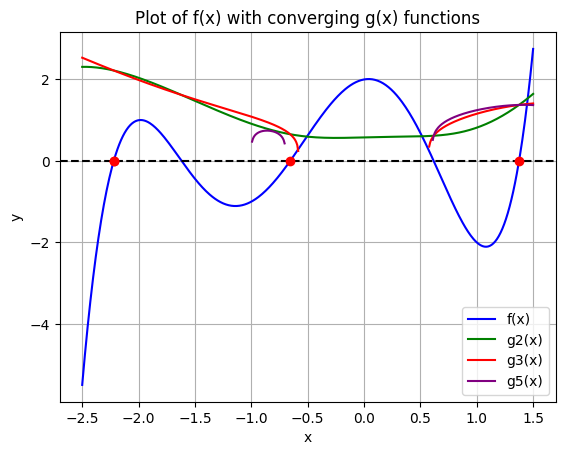

In [ ]:
#4g This cell should plot a graph. Do not plot those g(x) which will not converge.
x_vals = np.linspace(-2.5, 1.5, 500)
y_vals_f = f(x_vals)

plt.plot(x_vals, y_vals_f, label="f(x)", color='blue')
plt.axhline(0, color='black', linestyle='--')  # y = 0 reference line

y_vals_g2 = g2(x_vals)
y_vals_g3 = g3(x_vals)
y_vals_g5 = g5(x_vals)

plt.plot(x_vals, y_vals_g2, label="g2(x)", color='green')
plt.plot(x_vals, y_vals_g3, label="g3(x)", color='red')
plt.plot(x_vals, y_vals_g5, label="g5(x)", color='purple')

for root in roots:
    plt.plot(root, f(root), 'ro')

plt.title("Plot of f(x) with converging g(x) functions")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()